### 군집화 - Wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
pca = PCA(2)
wine_pca = pca.fit_transform(wine_std)
df = pd.DataFrame(wine_std, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


- 군집화

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2022)

In [8]:
df =pd.DataFrame({
    'PC1':wine_pca[:,0], 'PC2':wine_pca[:,1],
    'target':wine.target, 'cluster':kmeans.labels_

})
df.head()

,PC1,PC2,target,cluster
0,3.316751,-1.443463,0,2
1,2.209465,0.333393,0,2
2,2.516740,-1.031151,0,2
3,3.757066,-2.756372,0,2
4,1.008908,-0.869831,0,2


In [12]:
kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

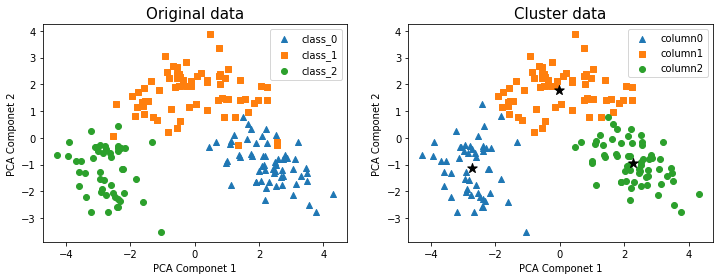

In [16]:
markers = ['^', 's', 'o']
plt.figure(figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='column' + str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)
    plt.legend()
    plt.xlabel('PCA Componet 1'), plt.ylabel('PCA Componet 2')
plt.show()